In [26]:
import numpy as np
import matplotlib.pyplot as plt
import bisect

In [27]:
def sin_x_2(x):
    return np.sin(x**2)

In [28]:
x_i = np.sort(np.random.uniform(0, 3, 30))
f_i = sin_x_2(x_i)

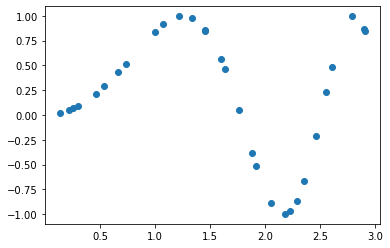

In [29]:
plt.scatter(x_i, f_i)

In [30]:
x_i

array([0.139339  , 0.21545328, 0.25551953, 0.30059465, 0.46362601,
       0.53964596, 0.66674503, 0.73498258, 0.99775005, 1.07543825,
       1.2135238 , 1.33624561, 1.45289147, 1.45821321, 1.59508514,
       1.63249039, 1.75895037, 1.88013674, 1.91848851, 2.05640918,
       2.1842035 , 2.22508301, 2.28708981, 2.35597526, 2.46302005,
       2.5520935 , 2.60465104, 2.78441861, 2.89513941, 2.90171682])

In [31]:
def find_nearest_neghbors(x_i_array, n, x):
    neighbors = []

    n_right = n_left = n//2
    index_of_first_right_neighbor = bisect.bisect_right(x_i, x)
    if 0 <= index_of_first_right_neighbor <= len(x_i_array) - 1:
        neighbors.append((index_of_first_right_neighbor, x_i_array[index_of_first_right_neighbor]))

    while n_right != 0:
        index = index_of_first_right_neighbor + n_right
        if index <= len(x_i_array) - 1:
            neighbors.append((index, x_i[index]))
        n_right -= 1

    while n_left != 0:
        index = index_of_first_right_neighbor - n_left
        if index >= 0:
            neighbors.append((index, x_i[index]))
        n_left -= 1
    
    return neighbors

In [33]:
def P(x, x_j, neighbors):
    pi = 1
    for _, x_k in neighbors:
        if x_j != x_k:
            pi *= (x - x_k) / (x_j - x_k)

    return pi

In [72]:
x_i = np.sort(np.random.uniform(0, 3, 30))
f_i = sin_x_2(x_i)

# f_i with noise:
n_noise = 1
random_indices = np.random.randint(0, len(f_i), size=n_noise)
for i in random_indices:
    f_i[i] = np.random.uniform(-1, 1)

In [77]:
X = np.linspace(0, 3, 100)
n = 5

f_x = []
for x in X:
    summation = 0

    neighbors = find_nearest_neghbors(x_i, n, x)
    for j, x_j in neighbors:
        summation += f_i[j] * P(x, x_j, neighbors)

    f_x.append(summation)

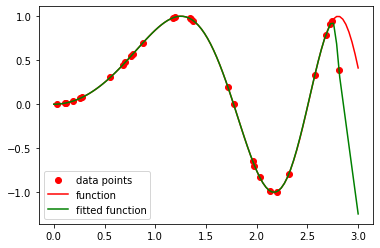

In [78]:
plt.scatter(x_i, f_i, c='red', label='data points')
plt.plot(X, sin_x_2(X), c='red', label='function')
plt.plot(X, f_x, c='green', label='fitted function')
plt.legend()